<a href="https://colab.research.google.com/github/nanoNNsk/python_practice/blob/main/65011103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Change runtime to GPU first and then:**

In [1]:
!nvidia-smi

Thu Jan 30 06:50:27 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Install Essential Libraries
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.6/914.6 kB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# **Install YOLOv8**

In [3]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import display, Image
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

In [5]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


**Unzip file dataset จาก drive**
*   ให้ดู path เป็น path ของตัวนักศึกษาเอง และชื่อไฟล์




In [6]:
!unzip '/content/drive/MyDrive/helmet_dataset/helmet_dataset2.zip'

Archive:  /content/drive/MyDrive/helmet_dataset/helmet_dataset2.zip
   creating: helmet_dataset2/
  inflating: helmet_dataset2/data.yaml  
   creating: helmet_dataset2/test/
   creating: helmet_dataset2/test/images/
  inflating: helmet_dataset2/test/images/000008_jpg.rf.thCiDmVGmG9wne11GfEP.jpg  
  inflating: helmet_dataset2/test/images/000011_jpg.rf.CFC9rCBtz0pnAorduLl6.jpg  
  inflating: helmet_dataset2/test/images/000034_jpg.rf.m1rqnOk4n2X9ZMszlAcz.jpg  
  inflating: helmet_dataset2/test/images/000047_jpg.rf.dvGkytXPixWP0fay0FME.jpg  
  inflating: helmet_dataset2/test/images/000054_jpg.rf.fZ9qbqmS1GDFLdgvu2Ck.jpg  
  inflating: helmet_dataset2/test/images/000073_jpg.rf.E20Gk0H0vwFVuA5cvzBE.jpg  
  inflating: helmet_dataset2/test/images/000076_jpg.rf.tw6uzaSKLztPTAvjFaxc.jpg  
  inflating: helmet_dataset2/test/images/000084_jpg.rf.6p13IJTzOUF9D66SO2hA.jpg  
  inflating: helmet_dataset2/test/images/000097_jpg.rf.KuaeRTd1G1najAP3AESq.jpg  
  inflating: helmet_dataset2/test/images/00009

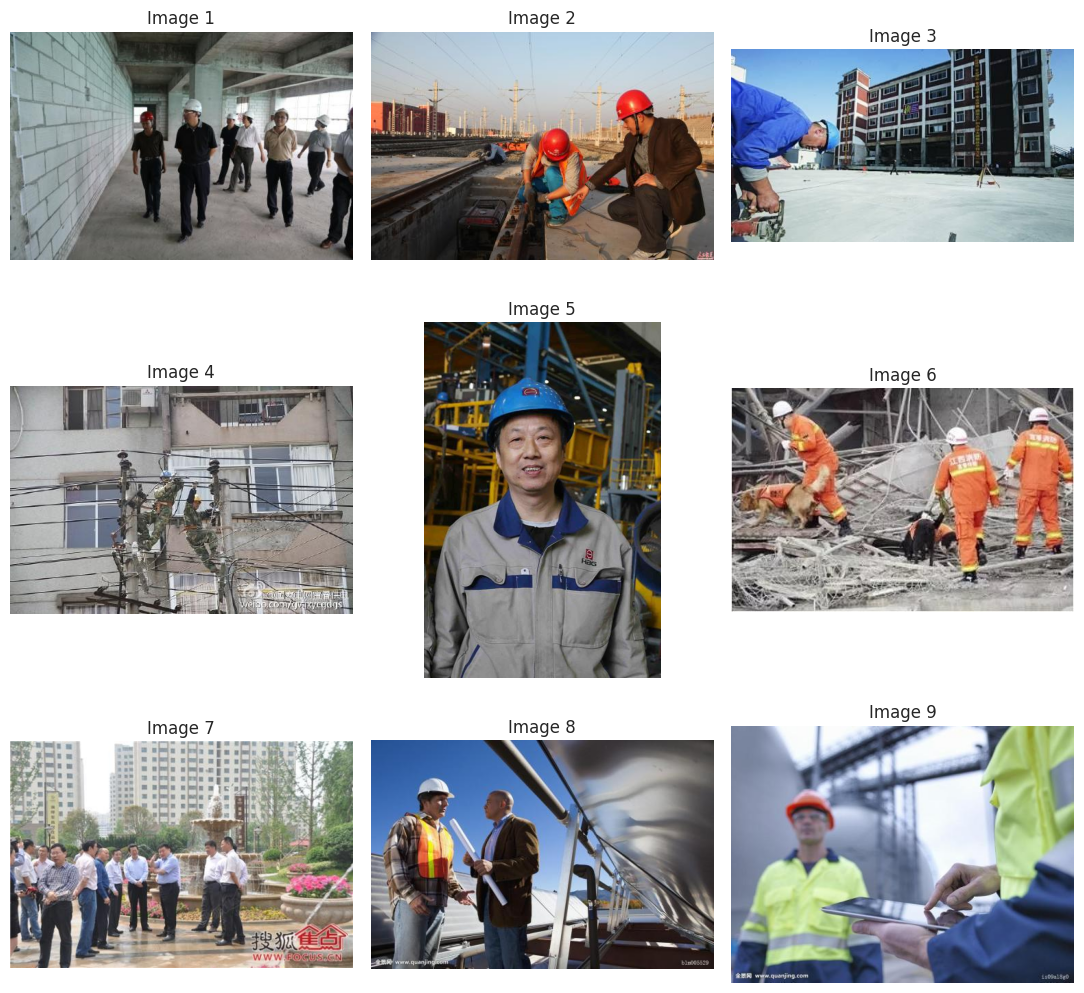

In [7]:
Image_dir = '/content/helmet_dataset2/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Get the size of the image
image = cv2.imread("/content/helmet_dataset2/train/images/000041_jpg.rf.lHu0iUSy8JUPNru1qMMe.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 540x300 and 3 channels.


# **Try Pre-trained YOLOv8**

In [9]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/helmet_dataset2/data.yaml epochs=30 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 216MB/s]
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/helmet_dataset2/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=Fal

 **Evaluated by test set**

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/helmet_dataset2/data.yaml split=test

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 957, in entrypoint
    model = YOLO(model, task=task)
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 146, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 289, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
                            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/nn/tasks.py", line 908, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
     

# **ทดลองใช้งาน Model**


image 1/1 /content/picresize1.jpeg: 640x448 1 helmet, 57.1ms
Speed: 4.6ms preprocess, 57.1ms inference, 157.7ms postprocess per image at shape (1, 3, 640, 448)


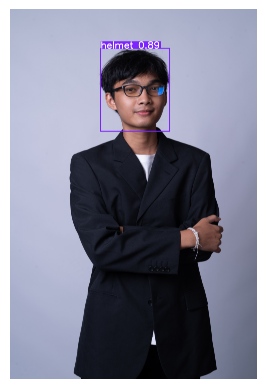

In [12]:
# trained YOLOv8n model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Use the model to detect object
image = "/content/picresize1.jpeg"
result_predict = model.predict(source = image, imgsz=(640), conf=0.5)

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
# display(Image.fromarray(plot))

plt.imshow(plot)
plt.axis('off')  # Optional: to turn off the axis
plt.show()